In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
df = pd.read_csv('/kaggle/input/company-acquisitions-7-top-companies/acquisitions_update_2021.csv')
df.head(3)

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-


In [2]:
df.tail(5)

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,-,Citrix ITM
1454,1455,Citrix,2021,Mar,Wrike,Project management,United States,-,-,Citrix Workspace


In [3]:
df = df.replace("-", np.nan)
df.head(3)

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
2,3,Apple,1988,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN


In [4]:
# Converting columns into numerical values
df['Acquisition Year'] = pd.to_numeric(df['Acquisition Year'], errors='coerce')
df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'], errors='coerce')

# Rename the column, per a billion
df = df.rename({'Acquisition Price': 'Acquisition Price(Billions)'}, axis=1)

<Figure size 1080x720 with 0 Axes>

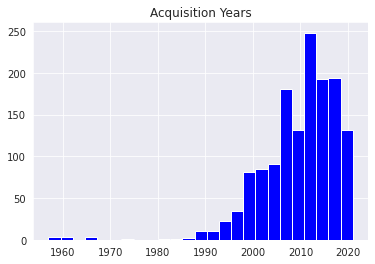

<Figure size 1080x720 with 0 Axes>

In [5]:
plt.hist(df['Acquisition Year'], bins=25, color='blue')
plt.title('Acquisition Years')

plt.figure(figsize=(15,10))


<AxesSubplot:title={'center':'Companies with Highest Number of Acquisitions'}, xlabel='Parent Company', ylabel='Acquisitions'>

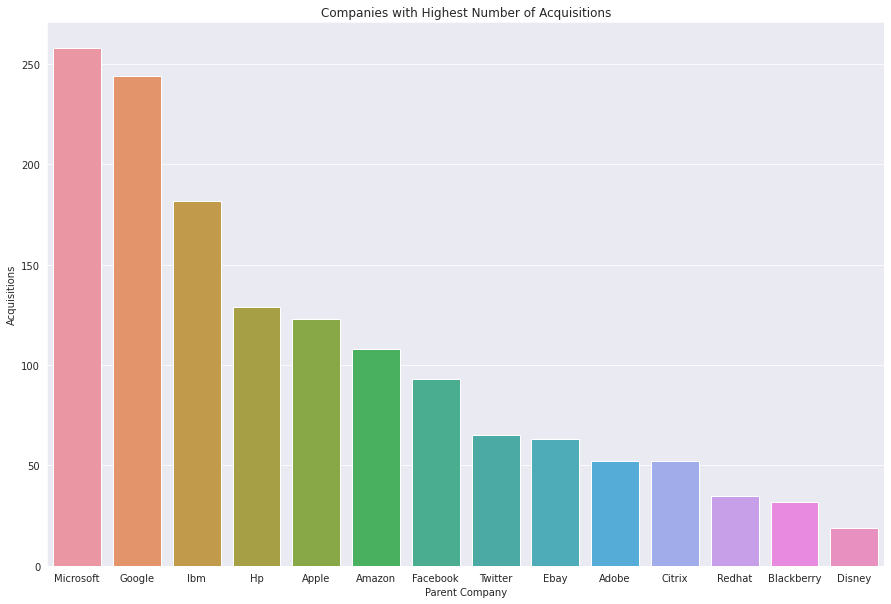

In [6]:
companies = df['Parent Company'].value_counts()
companies_df = companies.to_frame().reset_index()
companies_df = companies_df.rename({'index': 'Parent Company', 'Parent Company': 'Acquisitions'}, axis=1)
plt.figure(figsize=(15,10))
plt.title('Companies with Highest Number of Acquisitions')
sns.barplot(x='Parent Company', y='Acquisitions', data=companies_df)
#plt.text(x=4, y=150, s=text, size='x-large')

<AxesSubplot:title={'center':'20 Most Popular Businesses To Acquire'}, xlabel='Total', ylabel='Business'>

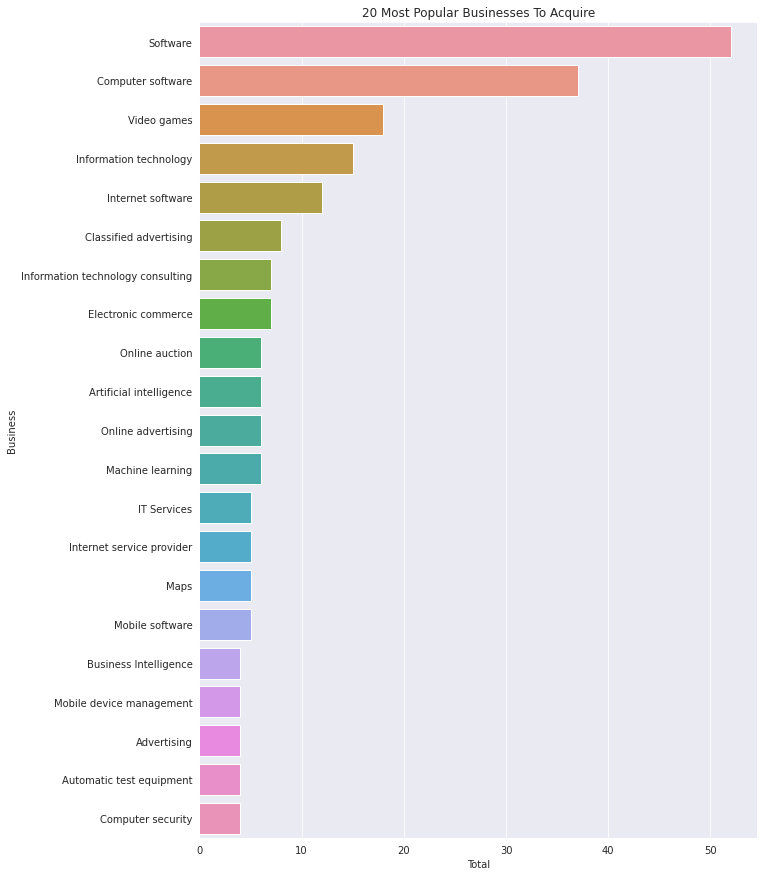

In [7]:
business = df['Business'].value_counts()
business_df = business.to_frame().reset_index()
business_df = business_df.rename({'index': 'Business', 'Business': 'Total'}, axis=1)
plt.figure(figsize=(10,15))
plt.title('20 Most Popular Businesses To Acquire')
sns.barplot(x='Total', y='Business', data=business_df[:21])

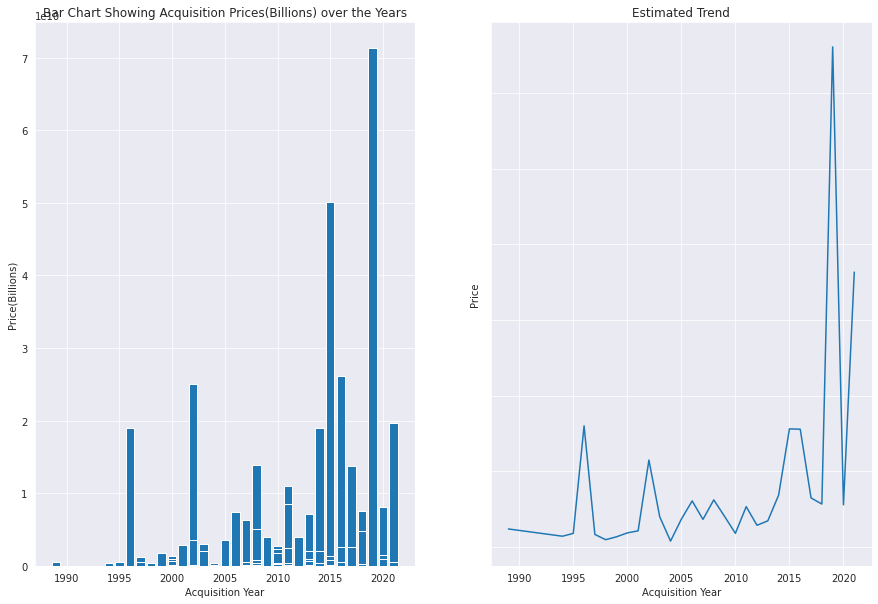

In [8]:
mask = df['Acquisition Year'].notnull() & df['Acquisition Price(Billions)'].notnull()
price_df = df[mask]

price_df = price_df[price_df['Acquisition Year'] > 1987]

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Bar Chart
axes[0].set_title('Bar Chart Showing Acquisition Prices(Billions) over the Years')
axes[0].bar('Acquisition Year', 'Acquisition Price(Billions)', data=price_df)
axes[0].set_xlabel('Acquisition Year')
axes[0].set_ylabel('Price(Billions)')



# Trend
axes[1].set_title('Estimated Trend')
sns.lineplot(data=price_df, x='Acquisition Year', y='Acquisition Price(Billions)', ax=axes[1], ci=None)
axes[1].set_ylabel('Price')



axes[1].yaxis.set_ticklabels([]);

In [9]:
expense_df = df.sort_values(by=['Acquisition Price(Billions)'], ascending=False)
num = expense_df.iloc[:20]['Acquisition Year'].astype(int)
exp = expense_df.iloc[:20]
exp = exp.reset_index(drop=True)
num = num.reset_index(drop=True)
exp.loc[:, 'Acquisition Year'] = num
exp[['Parent Company',  'Acquisition Price(Billions)', 'Acquired Company', 'Acquisition Year']]

,Parent Company,Acquisition Price(Billions),Acquired Company,Acquisition Year
0,Disney,7.130000e+10,21st Century Fox,2019
1,Twitter,5.010000e+10,Periscope,2015
2,Ibm,3.400000e+10,Red Hat,2019
3,Microsoft,2.620000e+10,LinkedIn,2016
4,Hp,2.500000e+10,Compaq,2002
5,Microsoft,1.970000e+10,Nuance Communications,2021
6,Facebook,1.900000e+10,WhatsApp,2014
7,Disney,1.900000e+10,Capital Cities/ABC Inc.,1996
8,Hp,1.390000e+10,Electronic Data Systems,2008
9,Amazon,1.370000e+10,Whole Foods Market,2017


In [10]:
df['Category'].value_counts()


Twitter Cortex              2
Mobile Twitter app (iOS)    1
Analytics tools             1
Revenue team                1
Revenue engineering team    1
Design                      1
MoPub                       1
Commerce                    1
Twitter Spaces              1
Name: Category, dtype: int64

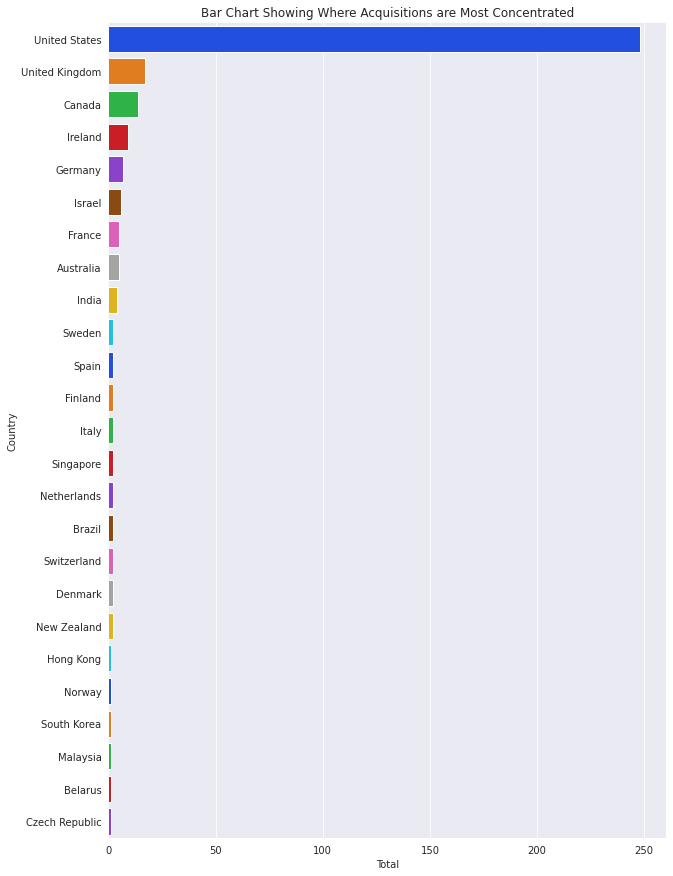

In [11]:
country = df['Country'].value_counts()
country_df = country.to_frame().reset_index()
country_df = country_df.rename({'index': 'Country', 'Country': 'Total'}, axis=1)
plt.figure(figsize=(10,15))
plt.title('Bar Chart Showing Where Acquisitions are Most Concentrated')
sns.barplot(x='Total', y='Country', data=country_df, palette='bright');

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           1455 non-null   int64  
 1   Parent Company               1455 non-null   object 
 2   Acquisition Year             1427 non-null   float64
 3   Acquisition Month            1397 non-null   object 
 4   Acquired Company             1455 non-null   object 
 5   Business                     1181 non-null   object 
 6   Country                      341 non-null    object 
 7   Acquisition Price(Billions)  383 non-null    float64
 8   Category                     10 non-null     object 
 9   Derived Products             403 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 113.8+ KB
